In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
common_drive_path = "/content/drive/MyDrive/AI_Project_14"

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd

# Gaze Vector

1.   np.load 사용하여 로드
2.   딕셔너리 키 := 파일명 확장자 부가요소 제거/ 추후에 concat 할 때 동일한 파일명으로 비교
3. 딕셔너리 값 := np.ndarray 1차원 벡터

In [ ]:
# GOOD video gaze vector with splined
path = common_drive_path + "/GAZE/good_gaze/"
good_gaze_file_names = os.listdir(path)
good_gaze_file_names.remove('scaled')
good_gaze_vectors = {}

for i, file_name in enumerate(good_gaze_file_names):
  good_gaze_vectors[file_name[:-4]] = np.load(path + file_name)

In [ ]:
good_gaze_vectors = dict(sorted(good_gaze_vectors.items()))

In [ ]:
# BAD video gaze vector with splined
path = common_drive_path + '/GAZE/bad_gaze/eye_moving/'
bad_gaze_file_names = os.listdir(path)
bad_gaze_vectors = {}

for i, file_name in enumerate(bad_gaze_file_names):
  bad_gaze_vectors[file_name[21:-4]] = np.load(path + file_name)
bad_gaze_vectors = dict(sorted(bad_gaze_vectors.items()))

In [ ]:
bad_gaze_vectors = dict(sorted(bad_gaze_vectors.items()))

In [ ]:
len(bad_gaze_vectors.keys())

49

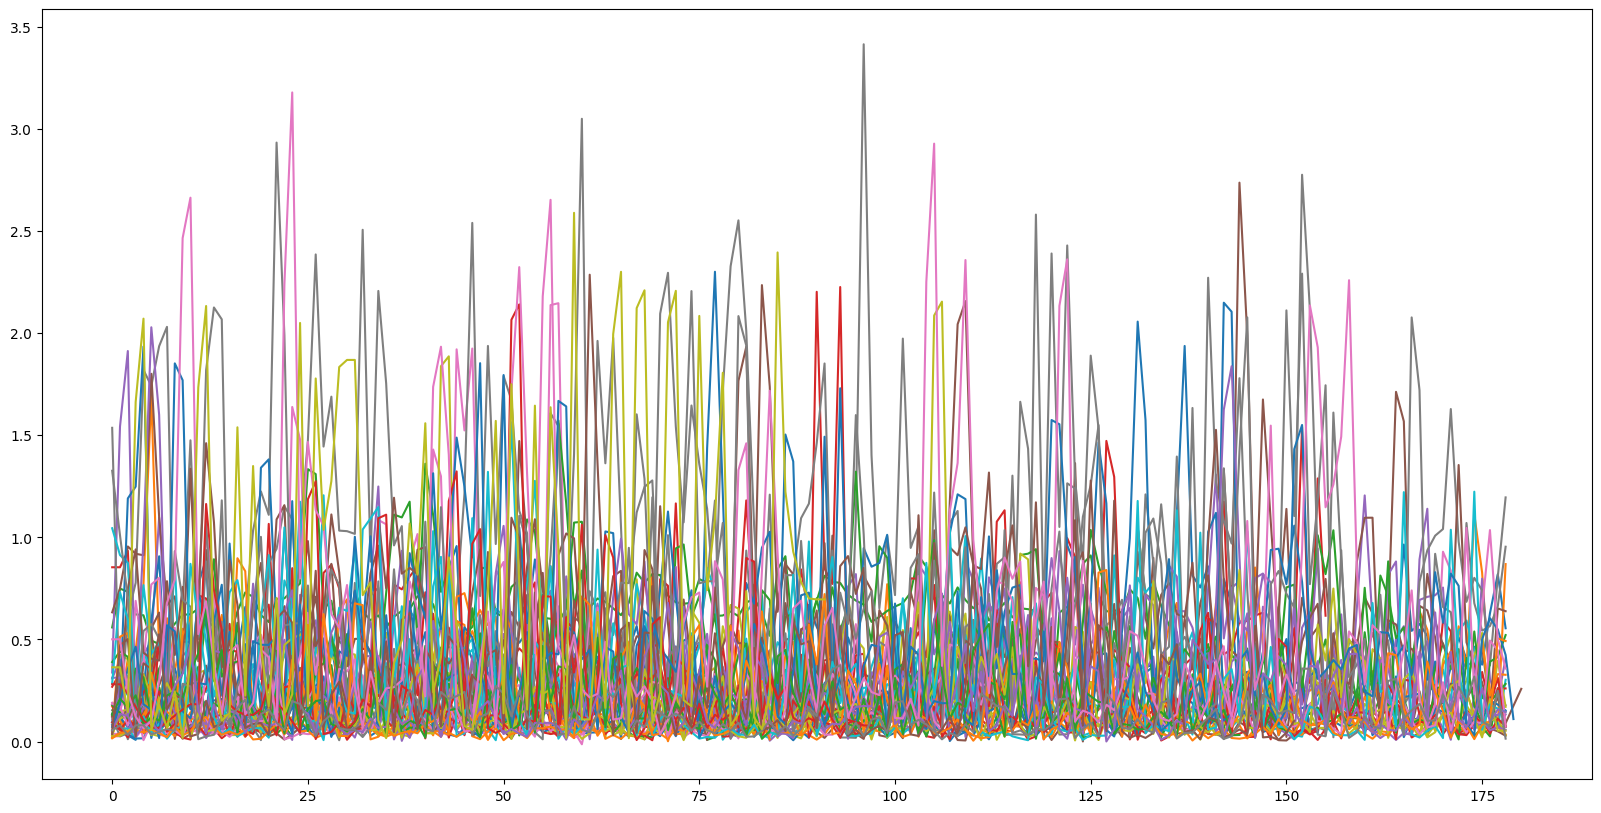

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
for key in bad_gaze_vectors.keys():
  ax.plot(bad_gaze_vectors[key], label = key)

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
rbs = RobustScaler()
for key in bad_gaze_vectors.keys():
  bad_gaze_vectors[key] = mms.fit_transform(bad_gaze_vectors[key].reshape(-1, 1))
  bad_gaze_vectors[key] = bad_gaze_vectors[key]
path = common_drive_path + "/GAZE/bad_gaze/scaled/"
for key in bad_gaze_vectors.keys():
  np.save(path + key[15:] + ".npy", bad_gaze_vectors[key])

In [ ]:
featrue_dicts = [good_gaze_vectors, bad_gaze_vectors]
for feature_dict in featrue_dicts:
  for key in feature_dict.keys():
    feature_dict[key] = rbs.fit_transform(feature_dict[key].reshape(-1, 1))
    feature_dict[key] = feature_dict[key]

In [ ]:
good_gaze_vectors['WoodyNorris_2004'].shape

(492, 1)

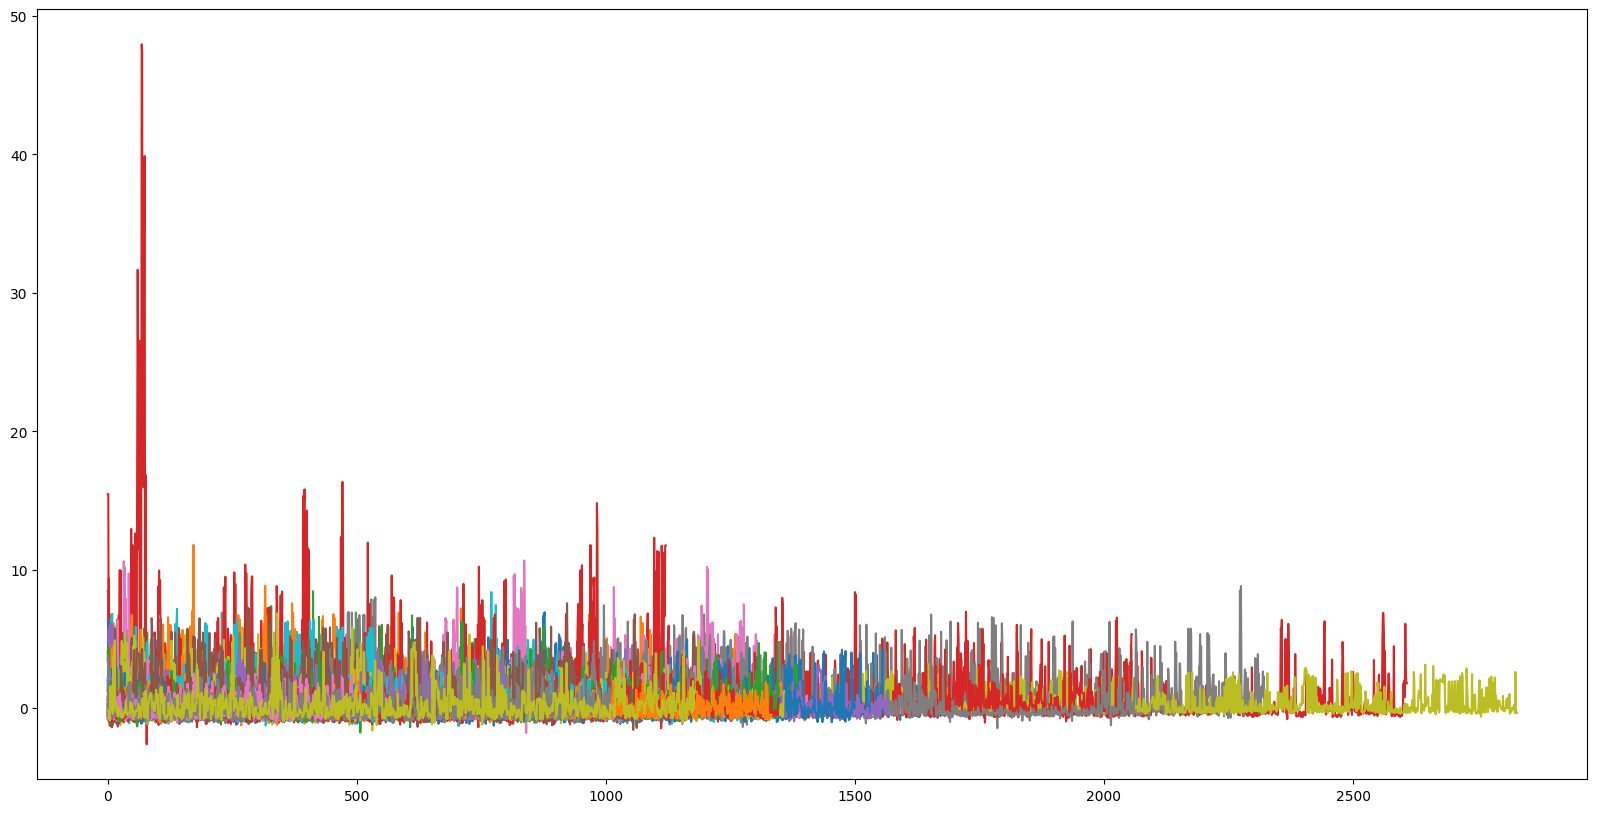

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
for key in good_gaze_vectors.keys():
  ax.plot(good_gaze_vectors[key])

In [ ]:
for key in good_gaze_vectors.keys():
  good_gaze_vectors[key] = mms.fit_transform(good_gaze_vectors[key].reshape(-1, 1))
  good_gaze_vectors[key] = good_gaze_vectors[key]

In [ ]:
path = common_drive_path + "/GAZE/good_gaze/scaled/"
for key in good_gaze_vectors.keys():
  np.save(path + key + ".npy", good_gaze_vectors[key])

In [ ]:
for key in bad_gaze_vectors.keys():
  bad_gaze_vectors[key] = mms.fit_transform(bad_gaze_vectors[key].reshape(-1, 1))
  bad_gaze_vectors[key] = bad_gaze_vectors[key]
path = common_drive_path + "/GAZE/bad_gaze/scaled/"
for key in bad_gaze_vectors.keys():
  np.save(path + key[15:] + ".npy", bad_gaze_vectors[key])

In [ ]:
path = common_drive_path + "/GAZE/bad_gaze/scaled/"
for key in bad_gaze_vectors.keys():
  np.save(path + key[15:] + ".npy", bad_gaze_vectors[key])